In [50]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats

In [12]:
# 普通最小二乘回归法（ols）
# 通过对自变量的加权和，来预测量化的因变量，其中权重是通过数据估计而得的参数
# 需满足条件：
# 1、正态性：对于固定自变量，因变量值成正态分布
# 2、独立性：对于每次实验的因变量之间相互独立
# 3、线性：因变量与自变量之间为线性相关
# 4、同方差性：因变量方差不随自变量的水平不同而比变化
women = pd.read_csv(r'data_set\women.csv', index_col = 0)
women.head(5)

,height,weight
1,58,115
2,59,117
3,60,120
4,61,123
5,62,126


In [17]:
model = smf.ols('height ~ weight', data=women).fit()
model

In [20]:
# 确定系数
model.rsquared

0.9910098326857505

In [19]:
# 确定系数
model.params

Intercept    25.723456
weight        0.287249
dtype: float64

In [21]:
model.summary()

c:\Users\Administrator\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           1.09e-14
Time:                        16:21:44   Log-Likelihood:                -7.8974
No. Observations:                  15   AIC:                             19.79
Df Residuals:                      13   BIC:                             21.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.7235      1.044     24.645      0.000      23.469      27.978
weight         0.2872      0.008     37.855      0.000       0.271       0.304
==============================================================================
Omnibus:                        1.951   Durbin-Watson:                   0.312
Prob(Omnibus):                  0.377   Jarque-Bera (JB):                1.485
Skew:                          -0.710   Prob(JB):                        0.476
Kurtosis:                       2.397   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# 回归系数
# 表示自变量对因变量的影响程度
# 1.解释变量的影响：回归系数帮助我们理解每个自变量对因变量的影响方向和大小
# 2、预测模型：回归系数用于构建回归模型预测方程，从而进行预测
# 3.变量选择：通过分析回归系数的显著性，可以选择对因变量有显著影响的自变量，优化模型
model.params

Intercept    25.723456
weight        0.287249
dtype: float64

In [23]:
# 残差平方和
y = women['height']
ypre = model.predict()
np.sum(np.square(y - ypre))

2.5172468479898513

In [24]:
# 总平方和
np.sum(np.square(y - np.mean(y)))

280.0

In [25]:
# R-square
1 - ((y - ypre).apply(np.square)).sum() / ((y - y.mean()).apply(np.square)).sum()

0.9910098326857505

In [26]:
# R-squared (uncentered)
1 - ((y - ypre).apply(np.square)).sum() / (y.apply(np.square)).sum()

0.9999604548448985

In [27]:
X1 = women[['height']]
X2 = women[['height']].apply(np.square).rename(columns={'height': 'height^2'})
y = women[['weight']]
sm.add_constant(X2)
sm.OLS(y, pd.concat([X1, X2], axis=1)).fit().summary()
# pd.concat([X1, X2])

c:\Users\Administrator\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 weight   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.042e+05
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                    4.65e-28
Time:                        16:23:30   Log-Likelihood:                         -22.527
No. Observations:                  15   AIC:                                      49.05
Df Residuals:                      13   BIC:                                      50.47
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.7309      0.071     10.316      0.000       0.578       0.884
height^2       0.0210      0.001     19.501      0.000       0.019       0.023
==============================================================================
Omnibus:                        2.272   Durbin-Watson:                   0.363
Prob(Omnibus):                  0.321   Jarque-Bera (JB):                1.542
Skew:                           0.763   Prob(JB):                        0.462
Kurtosis:                       2.628   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
state = pd.read_csv(r'data_set\state.csv', index_col = 0)
state

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766
Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862
Delaware,579,4809,0.9,70.06,6.2,54.6,103,1982
Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090
Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [29]:
# python 如何求每列之间的相关性
state.corr()

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Population,1.000000,0.208228,0.107622,-0.068052,0.343643,-0.098490,-0.332152,0.022544
Income,0.208228,1.000000,-0.437075,0.340255,-0.230078,0.619932,0.226282,0.363315
Illiteracy,0.107622,-0.437075,1.000000,-0.588478,0.702975,-0.657189,-0.671947,0.077261
Life Exp,-0.068052,0.340255,-0.588478,1.000000,-0.780846,0.582216,0.262068,-0.107332
Murder,0.343643,-0.230078,0.702975,-0.780846,1.000000,-0.487971,-0.538883,0.228390
HS Grad,-0.098490,0.619932,-0.657189,0.582216,-0.487971,1.000000,0.366780,0.333542
Frost,-0.332152,0.226282,-0.671947,0.262068,-0.538883,0.366780,1.000000,0.059229
Area,0.022544,0.363315,0.077261,-0.107332,0.228390,0.333542,0.059229,1.000000


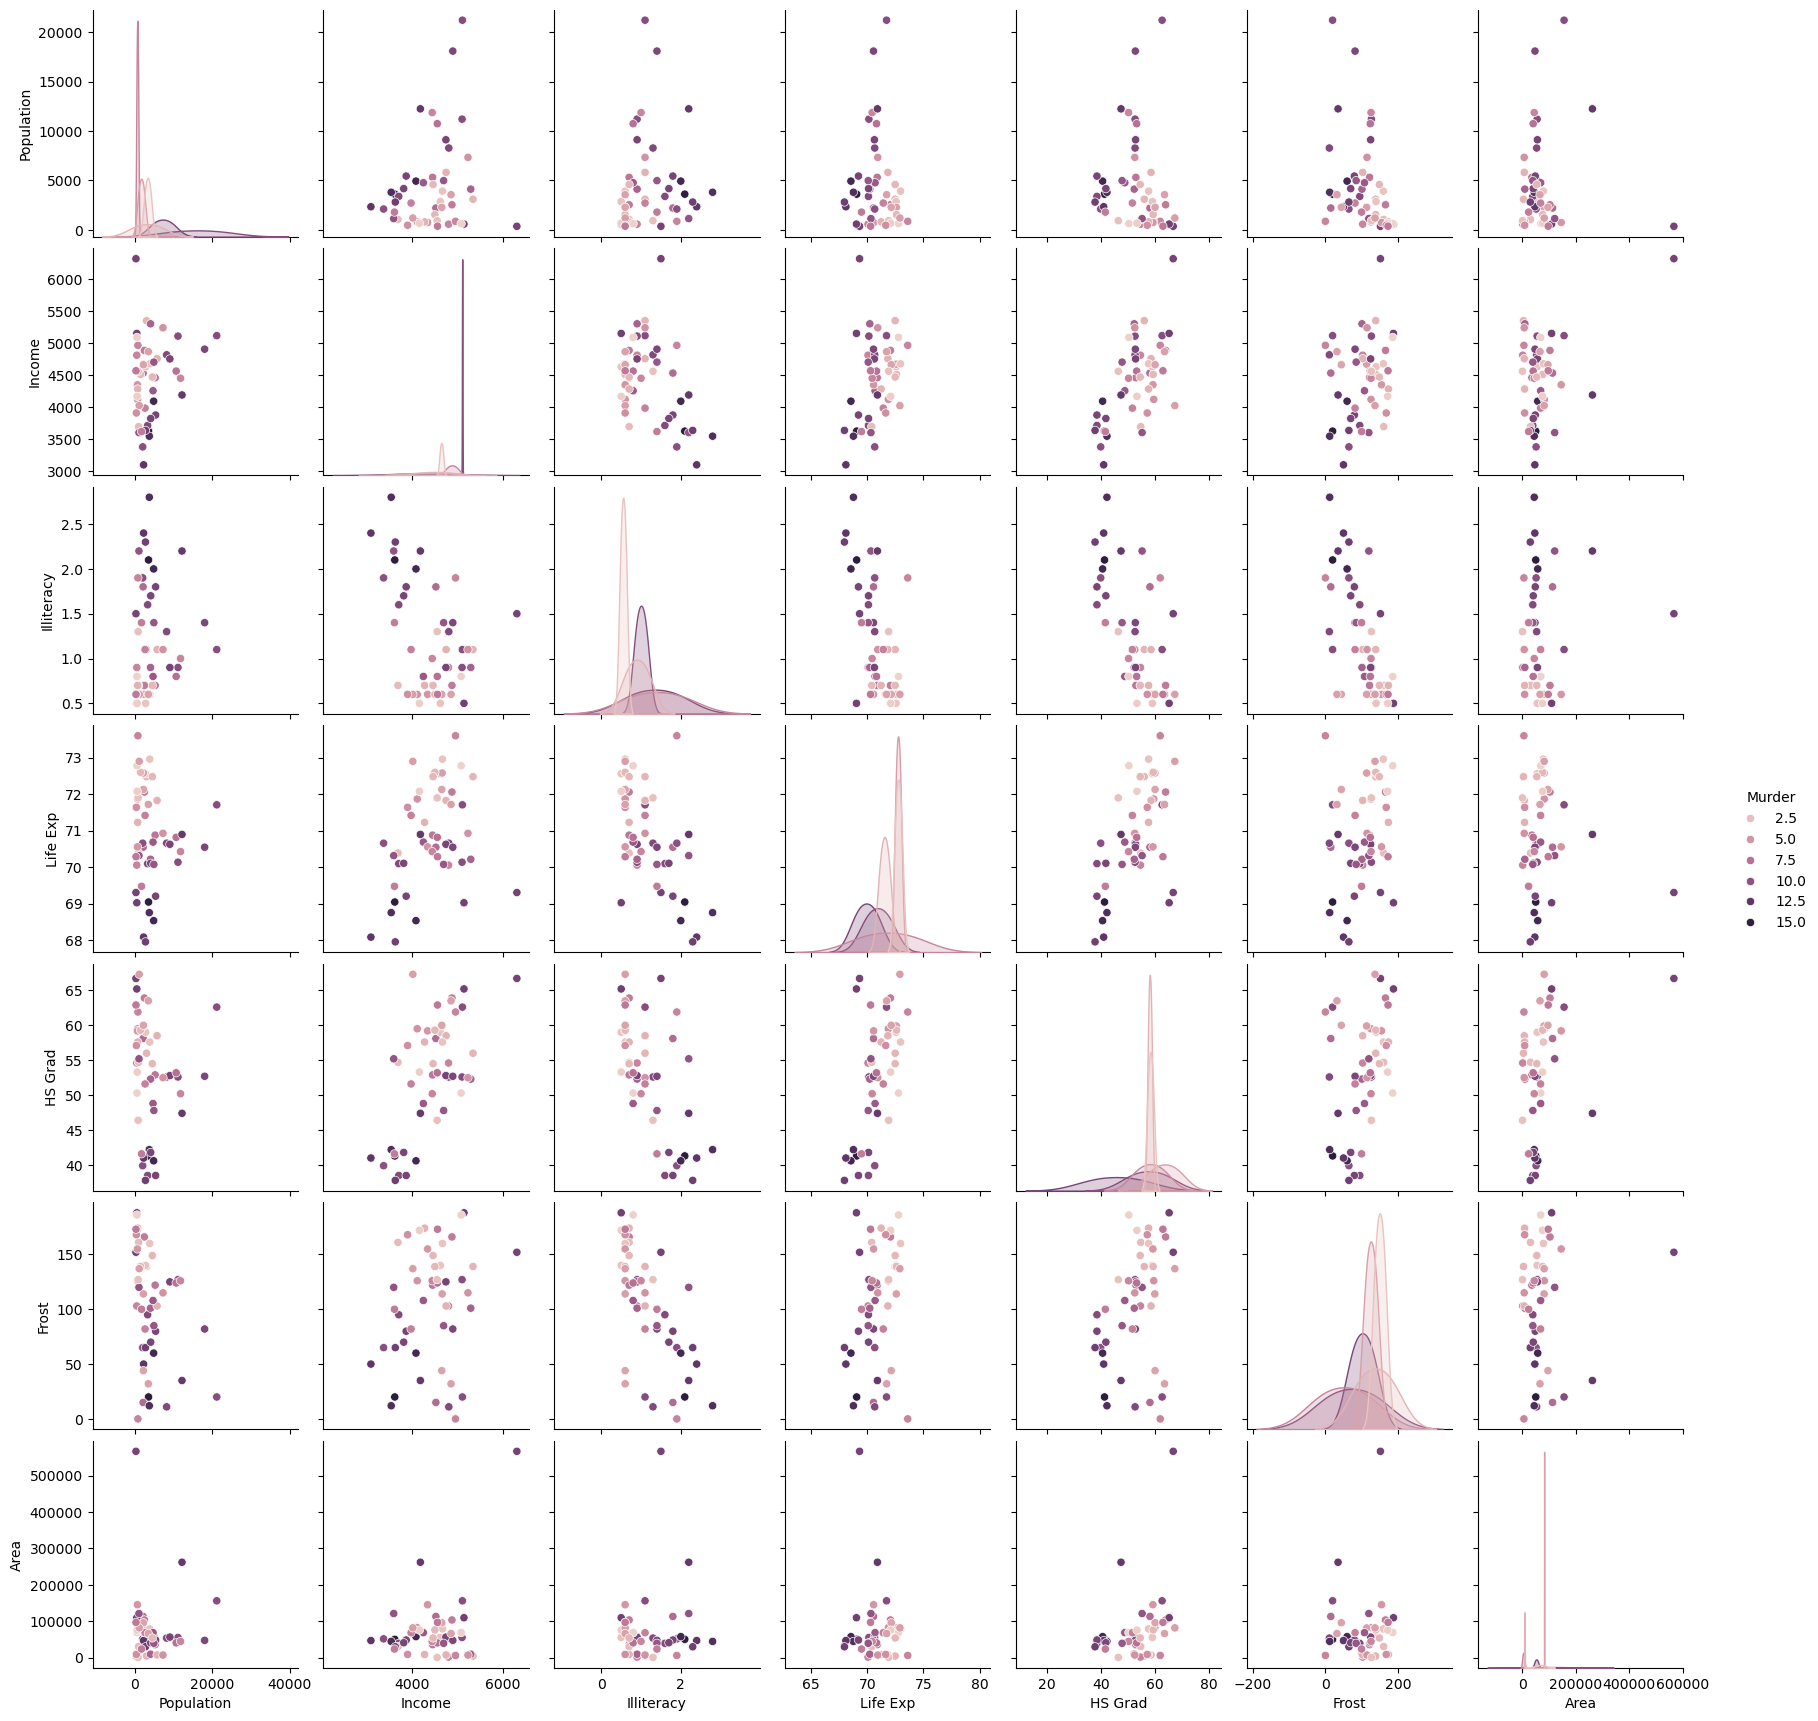

In [30]:
# scatterplot matrix
sns.pairplot(state, hue="Murder")

In [31]:
# 多元线性回归
state.reset_index().rename(columns={'index': 'Area'})

,Area,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361
5,Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766
6,Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862
7,Delaware,579,4809,0.9,70.06,6.2,54.6,103,1982
8,Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090
9,Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [32]:
state.columns

Index(['Population', 'Income', 'Illiteracy', 'Life Exp', 'Murder', 'HS Grad',
       'Frost', 'Area'],
      dtype='object')

In [34]:
state_mod = smf.ols('Murder ~ Population + Income + Illiteracy + Frost', data=state).fit()
state_mod

In [35]:
state_mod.params

Intercept     1.234563
Population    0.000224
Income        0.000064
Illiteracy    4.142837
Frost         0.000581
dtype: float64

In [36]:
state_sm = smf.ols('Murder ~ 1 + Population + Income + Illiteracy + Frost', state)
state_sm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Murder   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     14.73
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           9.13e-08
Time:                        16:25:46   Log-Likelihood:                -114.82
No. Observations:                  50   AIC:                             239.6
Df Residuals:                      45   BIC:                             249.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2346      3.866      0.319      0.751      -6.552       9.021
Population     0.0002   9.05e-05      2.471      0.017    4.14e-05       0.000
Income      6.442e-05      0.001      0.094      0.925      -0.001       0.001
Illiteracy     4.1428      0.874      4.738      0.000       2.382       5.904
Frost          0.0006      0.010      0.058      0.954      -0.020       0.021
==============================================================================
Omnibus:                        3.209   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                2.175
Skew:                           0.430   Prob(JB):                        0.337
Kurtosis:                       3.553   Cond. No.                     7.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
mtcars = pd.read_csv(r'data_set\mtcars.csv').rename(columns={'Unnamed: 0': 'model'})
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [38]:
# hp + wt + hp : wt(hp * wt)
mtcars_mod = smf.ols('mpg ~ hp + wt + hp : wt', mtcars)
mtcars_mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     71.66
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           2.98e-13
Time:                        16:26:28   Log-Likelihood:                -67.805
No. Observations:                  32   AIC:                             143.6
Df Residuals:                      28   BIC:                             149.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.8084      3.605     13.816      0.000      42.424      57.193
hp            -0.1201      0.025     -4.863      0.000      -0.171      -0.070
wt            -8.2166      1.270     -6.471      0.000     -10.818      -5.616
hp:wt          0.0278      0.007      3.753      0.001       0.013       0.043
==============================================================================
Omnibus:                        2.221   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.329   Jarque-Bera (JB):                1.736
Skew:                           0.407   Prob(JB):                        0.420
Kurtosis:                       2.200   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
var1 = mtcars[['hp']]
var1['wt'] = 2.2
var1['type'] = 'wt_2.2'
var1['ypre'] = mtcars_mod.fit().predict(var1)
var1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\3876056992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var1['wt'] = 2.2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\3876056992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var1['type'] = 'wt_2.2'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\3876056992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,hp,wt,type,ypre
0,110,2.2,wt_2.2,25.259872
1,110,2.2,wt_2.2,25.259872
2,93,2.2,wt_2.2,26.260087
3,110,2.2,wt_2.2,25.259872
4,175,2.2,wt_2.2,21.435521
5,105,2.2,wt_2.2,25.554053
6,245,2.2,wt_2.2,17.316990
7,62,2.2,wt_2.2,28.084008
8,95,2.2,wt_2.2,26.142414
9,123,2.2,wt_2.2,24.495002


In [40]:
var2 = mtcars[['hp', 'wt']]
var2['wt'] = 3.2
var2['type'] = 'wt_3.2'
var2['ypre'] = mtcars_mod.fit().predict(var2)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\1728578570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var2['wt'] = 3.2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\1728578570.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var2['type'] = 'wt_3.2'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\1728578570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [41]:
var3 = mtcars[['hp', 'wt']]
var3['wt'] = 4.2
var3['type'] = 'wt_4.2'
var3['ypre'] = mtcars_mod.fit().predict(var3)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\1452111746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var3['wt'] = 4.2
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\1452111746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var3['type'] = 'wt_4.2'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19528\1452111746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [42]:
var3

,hp,wt,type,ypre
0,110,4.2,wt_4.2,14.953216
1,110,4.2,wt_4.2,14.953216
2,93,4.2,wt_4.2,15.006594
3,110,4.2,wt_4.2,14.953216
4,175,4.2,wt_4.2,14.749124
5,105,4.2,wt_4.2,14.968915
6,245,4.2,wt_4.2,14.529334
7,62,4.2,wt_4.2,15.103930
8,95,4.2,wt_4.2,15.000314
9,123,4.2,wt_4.2,14.912398


In [43]:
result = pd.concat([var1, var2, var3], axis=0)
result

,hp,wt,type,ypre
0,110,2.2,wt_2.2,25.259872
1,110,2.2,wt_2.2,25.259872
2,93,2.2,wt_2.2,26.260087
3,110,2.2,wt_2.2,25.259872
4,175,2.2,wt_2.2,21.435521
...,...,...,...,...
27,113,4.2,wt_4.2,14.943796
28,264,4.2,wt_4.2,14.469676
29,175,4.2,wt_4.2,14.749124
30,335,4.2,wt_4.2,14.246746


<Axes: xlabel='hp', ylabel='ypre'>

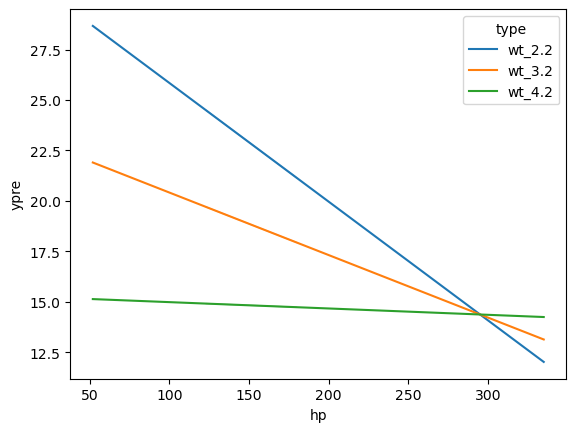

In [44]:
sns.lineplot(result, x='hp', y='ypre', hue='type')

In [45]:
# 回归检测
women_mod = smf.ols('weight ~ 1 + height + height^2', women)
women_mod.fit().summary()

c:\Users\Administrator\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     666.7
Date:                Wed, 07 Aug 2024   Prob (F-statistic):           5.04e-13
Time:                        16:27:04   Log-Likelihood:                -26.482
No. Observations:                  15   AIC:                             58.96
Df Residuals:                      12   BIC:                             61.09
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.7609      6.206    -14.141      0.000    -101.283     -74.239
height         3.5171      0.238     14.807      0.000       3.000       4.035
height ^ 2    -0.0635      0.206     -0.308      0.763      -0.513       0.386
==============================================================================
Omnibus:                        2.696   Durbin-Watson:                   0.342
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.727
Skew:                           0.822   Prob(JB):                        0.422
Kurtosis:                       2.749   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

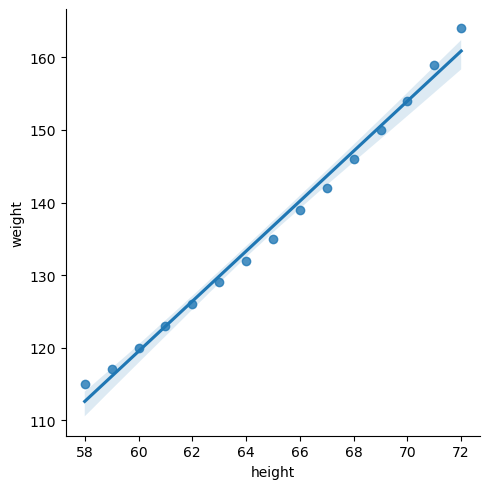

In [46]:
# Residuals vs Fitted
women['wpre'] = women_mod.fit().predict(women[['height']])
sns.lmplot(women, x='height', y='weight')

In [48]:
# 回归诊断
# R语言 car包中的qqplot()函数
# QQ图（quantile-quantile plot）用于检验数据是否符合某种分布

state_mod = smf.ols('Murder ~ Population + Illiteracy + Income + Frost', state)
state_mod 

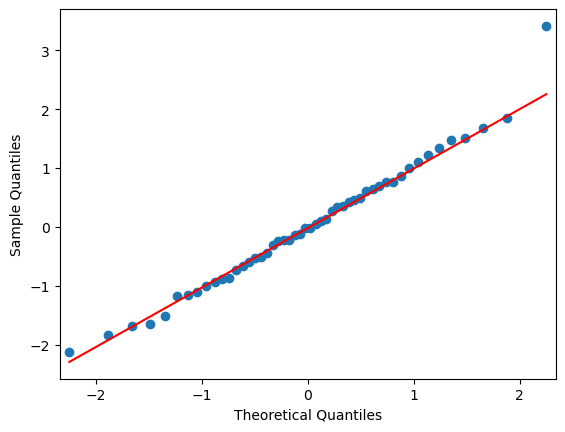

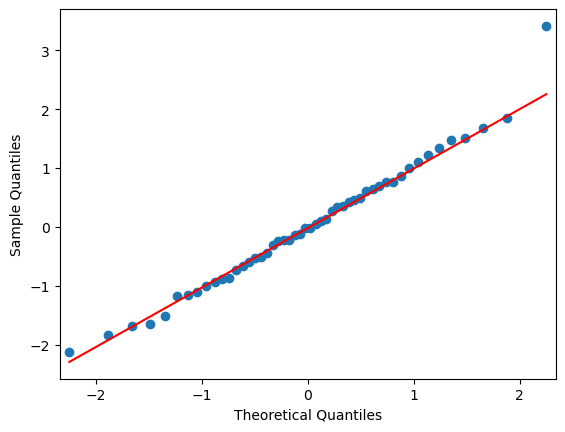

In [51]:
# resid：返回残差
# qqplot()函数主要参数：
# 1、data：绘制qq图的数据（残差）
# 2、dist：理论分布， 默认为标准正态分布
# 3、distargs：传递dist分布的额外参数
# 4、loc：理论分布的位移参数
# 5、scale：理论分布的缩放参数
# 6、fit
# 7、line：绘制参考线类型
# 8、ax
sm.qqplot(state_mod.fit().resid, stats.t, fit=True, line = 'q')

In [52]:
# sm.datasets.get_rdataset('').data 获取r语言中数据
# 拟合值
fitted_values = state_mod.fit().fittedvalues
# 残差
residual = state_mod.fit().resid
# 标准化残差（学生化残差）
influence = state_mod.fit().get_influence()
rstudent = influence.resid_studentized_internal

In [62]:
res = pd.DataFrame({
    'Area': state.index,
    'fitted': fitted_values,
    'residual': residual,
    'rstudent': rstudent
})
res

,Area,fitted,residual,rstudent
Alabama,Alabama,10.988208,4.111792,1.708071
Alaska,Alaska,8.025660,3.274340,1.714598
Arizona,Arizona,9.487003,-1.687003,-0.710495
Arkansas,Arkansas,9.833319,0.266681,0.110113
California,California,10.874248,-0.574248,-0.279028
Colorado,Colorado,5.114055,1.685945,0.684054
Connecticut,Connecticut,6.910422,-3.810422,-1.579864
Delaware,Delaware,5.462317,0.737683,0.299926
Florida,Florida,8.788211,1.911789,0.808283
Georgia,Georgia,10.921620,2.978380,1.210581


<Axes: >

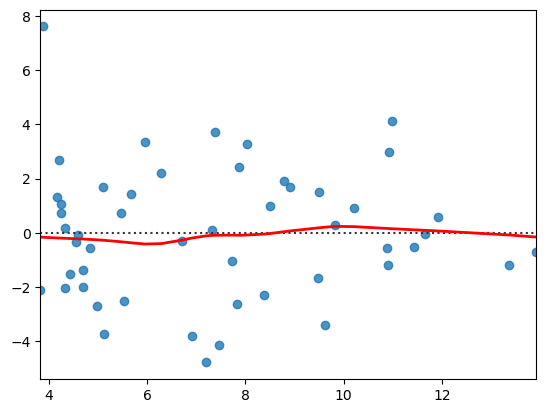

In [63]:
# 残差图
sns.residplot(x=fitted_values, y=residual, lowess=True, line_kws={'color': 'red', 'lw': 2})

In [64]:
# 残差分布图

In [65]:
# 误差独立性

In [66]:
# 多重共线性

In [67]:
# 交叉检验

In [55]:
states_ = pd.read_csv(r'data_set\state.csv', index_col=0)
states_

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
California,21198,5114,1.1,71.71,10.3,62.6,20,156361
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766
Connecticut,3100,5348,1.1,72.48,3.1,56.0,139,4862
Delaware,579,4809,0.9,70.06,6.2,54.6,103,1982
Florida,8277,4815,1.3,70.66,10.7,52.6,11,54090
Georgia,4931,4091,2.0,68.54,13.9,40.6,60,58073


In [56]:
states_.columns

Index(['Population', 'Income', 'Illiteracy', 'Life Exp', 'Murder', 'HS Grad',
       'Frost', 'Area'],
      dtype='object')

In [57]:
X = states_[['Population', 'Income', 'Illiteracy', 'Life Exp', 'HS Grad', 'Frost', 'Area']]
Y = states_[['Murder']]

In [58]:
# 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaler = scaler.fit_transform(X)

x_scaler.shape

(50, 7)

In [59]:
model = LinearRegression().fit(x_scaler, Y)

In [60]:
model.coef_

array([[ 0.83104805, -0.09684472,  0.82854388, -2.19915952,  0.25857129,
        -0.66299383,  0.50405789]])